## SVM introduction

In [ ]:
## Introduce and tell what will be explained on the text
# also telling what are the prerequisites

The Support vector machine algorithm (SVM) aims to categorize points, of different nature, located in a given space.
The SVM achieves that by finding a frontier that separates groups of points by the category they represent.


For the binomial case (Two possible categories), in a 2-dimensional space (two components), the points represent two independent variables, and a line exemplifies the frontier (Figure 1).

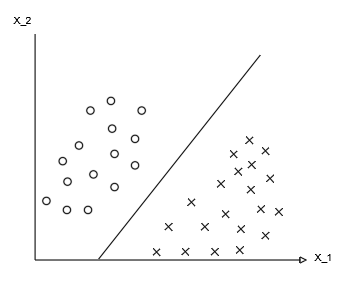
Figure 1

For example, we could set environmental pressure and temperature as independent variables and the state rain or no rain as independent variables. If we have found an optimum 2D frontier, the model would probably tell us that having high environmental pressure and low-temperature could cause rain. Another part of the space would contain the position of the points that do not cause rain.

Since this example is oversimplified and very likely non-real, we could use more independent variables to find a better representation.


In the same way that we use a line in a 2D space, we can use a point to separate a 1D space (Figure 2), a plane in a 3D space, and a hyperplane in a higher-dimensional space.

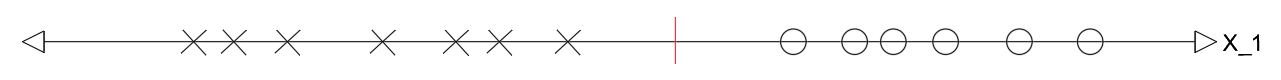
Figure 2

https://youtu.be/efR1C6CvhmE

Coming back to the 2D example, we can say that there is an infinite number of lines that can separate two categories of points (Figure 3). 
The line that is further apart from the closest point of the two classes is the one that generalizes the better. 

Therefore, the line that the algorithm chooses must accomplish two things, separate the set of points as correct as possible, and create the widest margin.
The margin is defined as the distance between the model and the closest point to it.

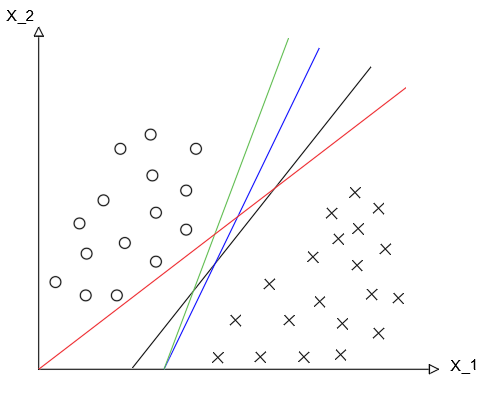
Figure 3

## SVM hard margin

A plane in a 2D space can be defined by $\omega_1 x_1 + \omega_2 x_2 + b= 0$, where each ith $\omega$ component is multiplied by the $x$ component with the same index. Therefore, the same equation can be written as $\omega^T x + b = 0$, which maintain the same form for higher dimensions.

Now we define the same scenario for general dimension. We can define a function that transform a vector from a space with dimension $D$ to the real numbers: $R^D \rightarrow{} R$; $x \rightarrow f(x)$. Mapping a hyperplane (a line in 2D). would give us $$f(x) = \omega^T x + b = 0   \; \; (1)$$

We want to find a hyperplane, for which we get $f(x_k) = \omega^T x_k + b \geq 0$ when the example $x_k$ falls on the positive side of the hyperplane and $f(x_k) = \omega^T x_k + b < 0$ on the negative side.

If we define $x_k$ as a point and $\omega$ as a vector, we can find that $\omega$ is perpendicular to the hyperplane over the function $f(x)$. 

Remembering the condition 1 ($f(x) = 0$), we can choose two points $x_a, x_b$ living inside the plane. Therefore,
$$f(x_a) - f(x_b) = (\omega^T x_a + b) - (\omega^T x_b + b)$$
$$= \omega^T x_a - \omega^T x_b -b + b$$
by the linearity of the dot product, and using (1)
$$= \omega^T(x_a - x_b) = 0$$
from here we can see that the dot product of $\omega$ and the vector created by $x_a - x_b$ is equal to zero, which means they are linearly independent, or orthogonal to each other.

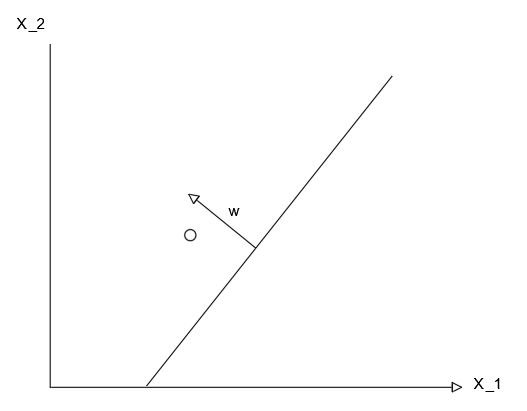
Figure 4

We have found that the vector $\omega$ is perpendicular to the plane, and therefore, we can define the distance to any point as.

$$d_H(x_k) =  \frac{|\omega^Tx_k + b|}{||\omega||_2} $$

We are trying to find a hyperplane that maximizes the margin, and therefore, we must find the closest positive and negative example.

$$ \min_k d_H(x_k) = \frac{|\omega^T x_k + b|}{||\omega||_2}$$

And then, find the longest distance between these points. The parameters that manipulate the position of the hyperplane are $\omega$ and $b$, thus

$$ \max_{w, b} \left \{ \min_k d_H(x_k) = \frac{|\omega^T x_k + b|}{||\omega||_2} \right \} \;\;\;\;\;(2)$$

Remembering that we want to find a function that classifies as positive, when the label $y_k$ is equal to 1 and negative, when the label is equal to -1,		

$$f(x_k) = \omega^T x_k + b \geq 0 \;\;\;\; y_k = 1$$ 
$$f(x_k) = \omega^T x_k + b < 0 \;\;\;\; y_k = -1$$

We can compress the two previous equations, in the form
$$y_k[\omega^Tx_k + b] \geq 0 \;\;\;\; (3)
$$

where the previous inequality is satisfied when the example is correctly classified.

Since (3) should be positive defined for all examples, the following equality stands, $y_k[\omega^Tx_k + b] = |\omega^T x_k + b|$, and we can substitute (3) in (2).

$$ \max_{w, b} \left \{ \min_k \frac{y_k[\omega^Tx_k + b] }{||\omega||_2} \right \} $$

Taking $||\omega||_2$ out of the equation since it does not depend on $k$

$$ 
\begin{align}
&\max_{w, b} \frac{1}{||\omega||_2} \left \{ \min_k y_k[\omega^Tx_k + b] \right \} & (4)
\end{align}
$$

We know that the closes example to the hyperplane is at a distance $r$, therefore, we can manipulate (4) as two different entities, maximizing $\frac{1}{||\omega||_2}$, given the constraint $\min_k y_k[\omega^Tx_k + b] = r$.

$$
\begin{array}{ll}
\max_{\omega, b} \frac{1}{||\omega||_2}\\
\text{S. t.   } \min_{k} y_k[\omega^T x_k + b] = r & (5)\\
\end{array}
$$

Stating that the rest of points are at a distance greater than $r$. 

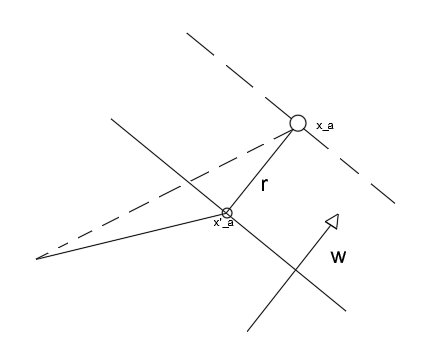
Figure 5

If we want to normalize the distance from the closes point, so that it becomes 1 instead of $r$, we can first define the following transformation.
$$ \omega = r\omega' \text{ and } b = rb'$$

$$y_k[(r\omega)^T x_k + rb] = r$$

And divide both sides by $r$

$$ y_k[(\omega)^T x_k + b] = 1 $$

The given constraint is then given by 

$$ \min_{k} y_k[(\omega)^T x_k + b] = 1$$

Which tell the algorithm to find certain $\omega$ and $b$ so that the distance of $x_{closest}$ is equal to 1, which is the same as saying that all values have to be equal or grater than 1.

$$\min_{k} y_k[(\omega)^T x_k + b] = 1 \longrightarrow y_k[(\omega)^T x_k + b] \geq 1$$

And therefore, we obtain from (5)

$$
\begin{align}
& \max_{\omega, b} \frac{1}{||\omega||_2}\\
&\text{S. t.  } y_k[\omega^T x_k + b] \geq 1
\end{align}
$$

Instead of maximizing the function $\frac{1}{||\omega||_2}$, it is usual the minimize the square of the reciprocal and multiply it by a constant $\frac{1}{2}$ to get a cleaner solution when the gradient is computed.

$$
\begin{align}
&\min_{\omega, b} \frac{1}{2} ||\omega||_2^2\\
&\text{S. t.  } y_k[\omega^T x_k + b] \geq 1 & (6)
\end{align}
$$

The previous equation can be solved using Lagrange multipliers, or convex optimization packages. The result of this two, would return a vector $omega$ and $b$, which will define a hyperplane that would predict positive values as positive, and negative values as negative.

## Slack variable

Real life datasets very rarely are separable, and thus the hard margin cannot solve this kind of problems.

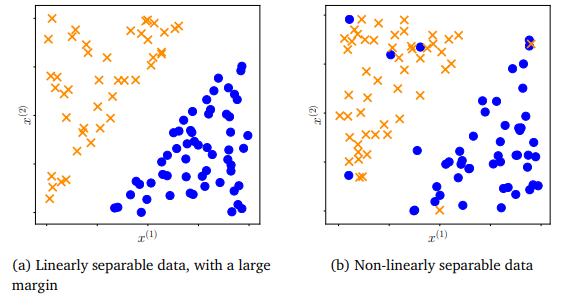
Figure 6

To solve this issue the slack variable ($\xi$) is introduced, which allows for some error when creating the hyperplane.

Lets define the margin of the positive examples as $m+$ and $m-$ for the opposite margin, and $+x_k$ for examples with label $y = 1$ and $-x_k$ for $y = -1$. Therefore the slack variable is given by the difference between $\pm m$ and $\pm x_k $ (Figure 7). With the constraint that this measurement just apply to examples that are inside the margin or on the wrong side of the hyperplane.

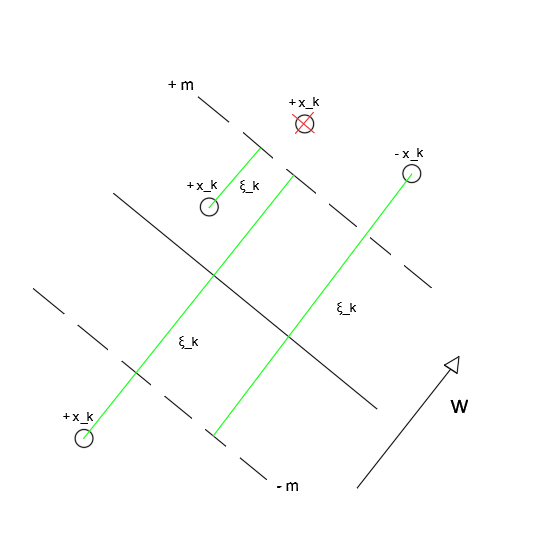
Figure 7

Instead of (6) we use the following equation to find the optimum model

$$
\begin{align}
& \min_{\xi, \omega, b} \sum_{k = 1}^N \xi_k & (7.1)\\
& \xi_k = \max \left(0, 1 - y_k[\omega_k^T x_k + b]  \right) & (7.2)\\
\end{align}
$$


lets define 
$$
\begin{align}
& t = y_k[\omega_k^T x_k + b]
\end{align}
$$

There are two main sceneries involving the previous model in a given space:

- If the point lay in the correct side of the hyperplane, $t$ will get a value grater than 1. The max function, will return the maximum value, which is 0, and its contribution to the total error is null.


- If the point lay either inside the margin or on the wrong side of the hyperplane, $t$ will return a value smaller than 1. The max function will return a value greater than 0, contributing to an increase in the total error ($\xi$).

<font size="2"> (7.2) is known as the hinge loss function. </font> 

Another way of expressing the Hinge loss

$$
\xi_k = \left\{
\begin{array}{ll}
0 & t \geq 1\\
1-t & t < 1
\end{array}
\right.
$$

An optimum model will get a value of $\sum_{k = 1}^N \xi_k = 0$. Since this is not possible on non-separable datasets, (7.1) will find a minimum when most cases are correctly classified. 

We can express (7.2) as $\xi \geq 0$ and $\xi \geq 1 - t$. The first one select from the set of examples and measure the non-correctly classified. The latter allow for some error, and relates it with the optimization coefficients. 

Therefore (7) can also be written as

$$
\begin{align}
& \min_{\xi, \omega, b} \sum_{k = 1}^N \xi_k &\\
& \text{S. t. } y_k[\omega_k^T x_k + b] \geq 1 - \xi_k & (8)\\
& \xi_k \geq 0
\end{align}
$$

Where

$$ \left\{
\begin{array}{ll}
    \omega^T x_k + b \geq 1 - \xi_k & y_k = 1\\
    \omega^T x_k + b \leq -1 + \xi_k & y_k = -1\\
\end{array}
\right.
$$

## SVM Soft Margin

The previous algorithm is a better approach for non-separable datasets, but it fails on creating the largest margin, on separable datasets. Therefore, a combination of both models was proposed. 

$$
\begin{align}
& \min_{\xi, \omega, b} \frac{1}{2} ||\omega||^2 + C\sum_{k = i}^N \xi_k\\
& \text{S. t.  } y_k[\omega^T x_k + b] \geq 1 - \xi & (8)\\
\\
& \xi_k \geq 0
\end{align}
$$

This model will try to maximize the length of the margin, allowing some points to fall on the wrong side of the hyperplane.


Comparing this equation with the regularized linear regression loss function, we can see, that for this case, we want to find a hyperplane that classifies the majority of points correctly ($C\sum_{k = i}^N \xi_k$), and to not over-fit, it tries to find the largest margin between the points ($\frac{1}{2} ||\omega||^2$).

The last term $\xi_k \geq 0$, which is given by its definition (7.2),  is explained in the previous paragraph.

The $C$ parameter regulates the impact of the examples lying on the wrong side. If we choose $C=\infty$ the penalty would be infinite if at least one example lies on the wrong side. The model would not allow values on the wrong side. 
In the contrary, if we choose $C = 0$ then any example falling in the margin or in the opposite site would not penalize the function, and therefore all points would contribute to create the margin.

from the previous paragraph we can derive that the largest the value of C, the more regularized it is.

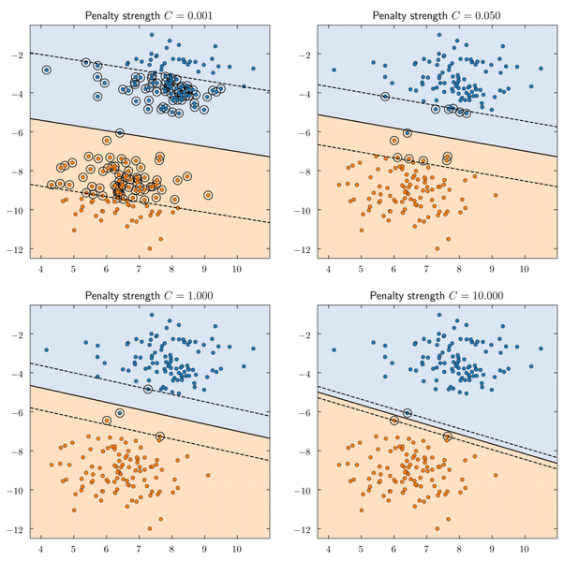
Figure 8

Slack variable explanation
- https://www.quora.com/What-is-the-purpose-for-using-slack-variable-in-SVM

### Lagrange multipliers solution

We can solve the previous equation by the Lagrange multipliers method. We will solve it by the dual problem. As mention in the appendix, one advantage of solving by the dual Lagrangian is passes from depending on primal variables to dual variables, therefore, allowing the use of spaces with infinite dimensions (feature spaces). Therefore, from now on, we will use the inner product notation, instead of the more specific dot product notation $x^Tx \rightarrow \langle x, x \rangle$.

First we set up the Lagrangian. Instead of using the commonly used notation for Lagrange multiplier ($\lambda$), we use $\alpha$ and $\eta$.

$$
\begin{align}
& \mathcal{L}(\omega, b, \xi, \alpha, \eta) = \frac{1}{2}||\omega||^2 + C\sum_{k = 1}^N \xi_k - \sum_{k = 1}^N \alpha_k \left( y_k[\langle \omega, x_k \rangle + b]- 1 + \xi_k \right) - \sum_{k = 1}^N \eta_k \xi_k & (9)
\end{align}
$$

Where $\alpha \geq 0$ corresponding to examples correctly classified and $\eta \geq 0$ to positive error values

Then we derive over the three primal variables $\omega$, $b$ and $\xi$ and equalize to zero (first order conditions).

- $\nabla_{\omega}$

$||\omega|| = \sqrt{\langle \omega, \omega \rangle}$

$$
\begin{equation}
    \therefore \nabla_{\omega}\mathcal{L} = \omega - \sum_{k = 1}^N \alpha_k y_k x_k = 0 \longrightarrow \omega = \sum_{k = 1}^N \alpha_k y_k x_k \;\;\;\;\;\ (10a)
\end{equation}
$$

- $\frac{\partial\mathcal{L}}{\partial b}$

$$
\begin{equation}
    \frac{\partial\mathcal{L}}{\partial b} = \sum_{k = 1}^N \alpha_k y_k = 0 \longrightarrow \sum_{k = 1}^N \alpha_k y_k = 0 \;\;\;\;\;\ (10b)
\end{equation}
$$

- $\frac{\partial\mathcal{L}}{\partial \xi_k}$

$$
\begin{equation}
    \frac{\partial\mathcal{L}}{\partial \xi_k} = C - \alpha_k - \eta_k = 0 \longrightarrow C - \alpha_k = \eta_k \;\;\;\;\;\ (10c_a)
\end{equation}
$$

Since $\alpha_k, \eta_k \geq 0$

$$ C -\alpha_k = +$$

We get that 

$$ 0 \leq \alpha_k \geq C \;\;\;\;\;\ (10c_b)$$

Substituting (10a) and (10b) in (9) we get the dual problem

$$
\begin{equation}
\mathcal{D}(\alpha, \eta) = 
\frac{1}{2}\sum_{k = 1}^N \alpha_k y_k x_k \left (\sum_{l = 1}^N \alpha_l y_l x_l \right) + 
C\sum_{k = 1}^N \xi_k -
\sum_{k = 1}^N \alpha_k y_k \left( \sum_{l = 1}^N \alpha_l y_l x_l \right) x_k - 
\sum_{k = 1}^N \alpha_k y_k b + 
\sum_{k = 1}^N \alpha_k - 
\sum_{k = 1}^N \alpha_k \xi_k -
\sum_{k = 1}^N \eta_k \xi_k \;\;\;\;\; (11)
\end{equation}
$$

- The first term is a composition of two sums. Since the index $k$ is independent of $l$, the coefficients can be combined following each sum order

- From the third term we know that the inner product is symmetric and the process of the first term also applies.

- In the fourth coefficient the constant b can be taken outside of the sum, and from (10b) we know that the sum is equal to 0.

$$
\begin{equation}
\mathcal{D}(\alpha, \eta) = 
\frac{1}{2}\sum_{k = 1}^N \sum_{l = 1}^N \alpha_k \alpha_l y_k y_l x_k x_l +
C\sum_{k = 1}^N \xi_k -
\sum_{k = 1}^N \sum_{l = 1}^N \alpha_k \alpha_l y_k y_l x_k x_l +
\sum_{k = 1}^N \alpha_k -
\sum_{k = 1}^N \alpha_k \xi_k -
\sum_{k = 1}^N \eta_k \xi_k \;\;\;\;\; (12)
\end{equation}
$$

- The first term is 1/2 of the third term.

- The second, fifth and sixth terms have the vector $\xi_k$ in common and the sum runs on the same index.

$$
\begin{equation}
\mathcal{D}(\alpha, \eta) = 
-\frac{1}{2}\sum_{k = 1}^N \sum_{l = 1}^N \alpha_k \alpha_l y_k y_l x_k x_l +
\sum_{k = 1}^N \alpha_k +
\sum_{k = 1}^N \left(C  -\eta_k - \alpha_k \right) \xi_k \;\;\;\;\; (13)
\end{equation}
$$

The last term has the form of ($10c_a$), where each kih term is equal to 0, and therefore, each product is equal to 0 and the term fades away.

$$
\begin{equation}
\mathcal{D}(\alpha, \eta) = 
-\frac{1}{2}\sum_{k = 1}^N \sum_{l = 1}^N \alpha_k \alpha_l y_k y_l x_k x_l +
\sum_{k = 1}^N \alpha_k \;\;\;\;\; (14)
\end{equation}
$$

Recalling that in the dual problem  $\mathcal{D}(\alpha, \eta)$ we want to maximize over the dual variables (appendix dual problem), and (10b).

$$
\begin{align}
& \max_{\alpha, \eta} -\frac{1}{2}\sum_{k = 1}^N \sum_{l = 1}^N \alpha_k \alpha_l y_k y_l x_k x_l +
\sum_{k = 1}^N \alpha_k\\
& \text{S. t. }  \sum_{k = 1}^N \alpha_k y_k = 0\\
& 0 \leq \alpha \geq C
\end{align}
$$

We know that the previous function is either concave or convex. We can compute the minimum of the negative of the resulting problem

$$
\begin{align}
& \min_{\alpha, \eta} \frac{1}{2}\sum_{k = 1}^N \sum_{l = 1}^N \alpha_k \alpha_l y_k y_l x_k x_l -
\sum_{k = 1}^N \alpha_k\\
& \text{S. t. }  \sum_{k = 1}^N \alpha_k y_k = 0\\
& 0 \leq \alpha \geq C
\end{align}
$$

Its necessary to apply complementary Slackness Constraints, which in this case is given by.

$$
\begin{align}
    &\alpha_k(y_k[\langle \omega, x \rangle + b] - 1 + \xi_k) = 0 & (15a)\\
    &\eta_k \xi_k = 0 & (15b)
\end{align}
$$

Since the previous product is equal to zero and recalling $\alpha_k, \eta_k \geq 0$, there are two posibilidades for each equality.

$(15a)$

\# 1 $\alpha_k = 0$ and $y_k[\langle \omega, x \rangle + b] \geq 1 - \xi_k$

## Kernel 

## Prediction

The problem above can be solve numerically with a quadratic solver, which for the dual problem return the set of optimum $\alpha_k$  that satisfy the previous conditions.

The problem is to find the optimum hyperplane that separate the dataset and gets the largest margin. For the **linear kernel** problem we can find $\omega$ and $b$ values from the optimum $\alpha$. In other words, due to the Complementary Slackness Condition, the number of $\alpha_k$ and therefore, the number of variables used to find optimum primal parameters is reduced. To predict we can use the previously found coefficients and insert them on the plane equation with the vector of independent variables to predict ($x_test$).

Given


$$
\begin{equation}
    f(x) =  \omega^T x+ b
\end{equation}
$$

**Finding optimum values**

- $\omega$ from (10a)

$$
\begin{equation}
\omega = \sum_{k = 1}^N \alpha_k y_k x_k = (\mathbf{\alpha} \circ \mathbf{y}) \circ \mathbf{x}
\end{equation}
$$ 

As shown in the previous equation, the $\omega$ coefficient can be numerically computed by element-wise multiplication between vectors.

- From $y_k[\omega^T x_k + b] = 1$ we can solve for $b$

$$
\begin{equation}
    b' = \frac{1}{y_l} + \omega^T x_l = y_l + \omega^T x_l = y_l + \sum_{k = 1}^N \alpha_k y_k x_k^T x_l
\end{equation}
$$

When finding optimum coefficients the $k$ index represents the filtered variables, while the $l$ index represent the non-filtered variables.

The $b$ coefficient must be a constant. Since the previous equation returns a vector. The mean of the previous vector is computed.

$$ b = \frac{1}{N}\sum_{k = 1}^N(b') $$

**Prediction**

$$
\begin{equation}
    f(x) =  \omega^T x_{\text{test}} + b
\end{equation}
$$

For the **non-linear and non-separable kernels**, it is not possible to find an $\omega$, instead $\langle \omega, \phi \rangle$, is used which is dependent on the kernel (is a computable coefficient) and can be inserted in the plane equation.
To predict new values, a new kernel in terms of the training and test examples must be constructed  ($k(x_k, x_{\text{test}})$).

Given

$$
\begin{equation}
    f(x) = \langle \omega, \phi(x) \rangle + b
\end{equation}
$$

**Finding optimum coefficient**

Recalling the slackness condition, the Kernel is filtered (as well as the rest of variables), corresponding to the remaining $\alpha_k$. The only coefficient that we need for this case is $b$, which will be permanent even for new values. 

$$
\begin{equation}
    b = 
    \frac{1}{N}\sum_{l = 1}^N \left[ y_l + \langle \omega, \phi(x_l) \rangle \right] = 
    \frac{1}{N}\sum_{l = 1}^N \left[ y_l +  \left( \sum_{k = 1}^N \alpha_k y_k \phi(x_k)\right)\phi(x_l) \right] =
    \frac{1}{N}\sum_{l = 1}^N \left[ y_l +  \sum_{k = 1}^N \alpha_k y_k K(x_k, x_l) \right]
\end{equation}
$$

$x_l$: non_filtered vectors

**Prediction**

As said before, when predicting, new kernels have to be constructed with the new input variables.

$$
\begin{equation}
    \langle \omega, \phi_{\text{test}} \rangle = 
    \left( \sum_{k = 1}^N \alpha_k y_k \phi(x_k)\right)\phi(x_{\text{test}}) = 
    \sum_{k = 1}^N \alpha_k y_k K(x_k, x_{\text{test}})
\end{equation}
$$

And finally, those values have to be inserted in the plane equation

$$
\begin{equation}
    f(x) = \langle \omega, \phi_{\text{test}} \rangle + b
\end{equation}
$$

## Apendix

### Vectors

The classic representation of a geometrical vector in a 2D space is given by $y = xm + b$. Where m represents the slope of the line and b the intercept. Also $-y + xm + b = 0 \longleftrightarrow{} -f(x) + xm + b = 0$. A more general representation can be given by the $a_1 \hat{i} + a_2 \hat{j} + b= 0$, where $\hat{i}$ and $\hat{j}$ are the unitary vectors. In an euclidean space, the same vector can be represented as $a_1 \hat{e_1} + a_2 \hat{e_2} + b = 0$. If we decompose $a_i = q_i \cdot \lambda$, where $a_i$ represents a constant multiplied by any real value, we can rewrite the same vector as. $(q_1 \cdot \lambda) \hat{e_1} + (q_2 \cdot \lambda) \hat{e_2} + b = 0$. That means that the same value of $\lambda$ is assigned to each of the components of the given point; therefore, having just one free variable.

Using the last notation, we can define a point in a 2D space as $$4\hat{e_1} + 2\hat{e_2} + 5 = 0$$ 
Where $a_1 = 2 \cdot 2$,  $a_2 = 1 \cdot 2$ and $b = 5$. 

Another point inside the same vector, can be defined as $3\hat{e_1} + 2\hat{e_2} + 5 = 0$, which can, at the same time, span the whole vector/subspace/affine subspace, due to the vector $\leftrightarrow{}$ point duality.

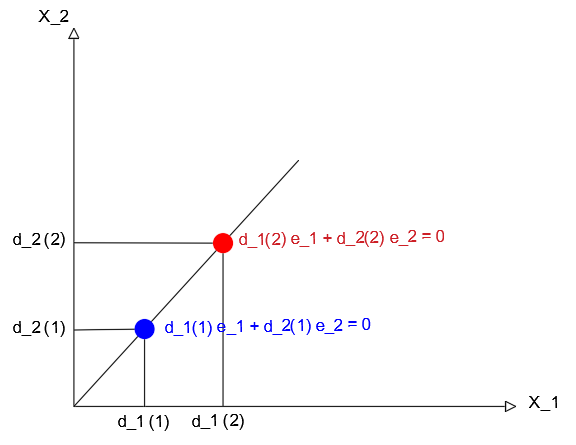
Figure 4

### Plane

A plane inside a 3D space can be defined as $Ax + By + Cz = D \leftrightarrow{} Ax + By + Cz - D = 0$  in generalized notation, it can be represented as $a_1 \hat{e_1} + a_2 \hat{e_2} + a_3 \hat{e_3} = a_4$

In the same way, each component can be decompose into constants and incremental variables. For this case, we would need two free variable as follows $a_i = (p_i \cdot \lambda + q_i \cdot \mu)$

### distance from a plane

####  1st derivation

Given a euclidean space (where the components of the basis are orthonormal), we can find a distance between a point and a plane by finding the component of the resulting vector* perpendicular to the plane.

In this case, we will define any point in the plane, to define a vector $\vec{a}$ created by the point $a$.
Then, we will construct a vector $\vec{b}$ perpendicular to the plane (Figure 5), which will guarantee the minimum distance. It can be proven that a normal vector can be constructed with the value of the components of the plane (e.g $4x + 3y + 3 = 0  \rightarrow{} \vec{v} = 4\hat{i} + 3\hat{j}$)

The dot product returns a combination of the components of the two vectors. Since we are only interested on the length of the vector $\vec{a}$, we will dot the vector $\vec{a}$ with the unitary vector $\frac{\vec{b}}{||b||}$, Since we are just looking for the positive values the dot product (distance), we would get,

$$dist(a, P_0) = \frac{|a \cdot b|}{||b||_2}$$

<font size="2">* Remembering the point-vector duality, we can define the given point as a vector. </font> 

https://www.youtube.com/watch?v=SgJo7_4mp6w

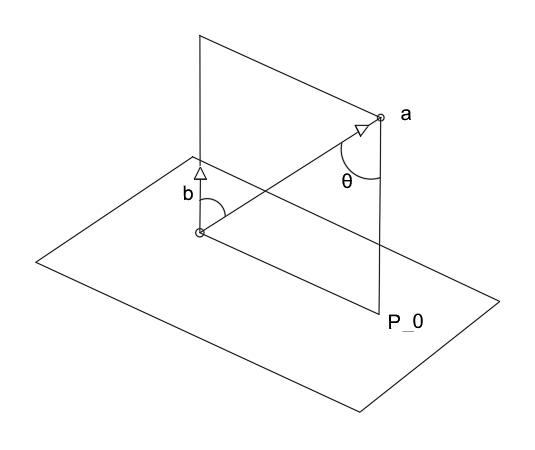
Figure 5

#### 2nd derivation

From Figure 5 we can see that the distance of the point $a$ to the plane is given by $distance(a, P_o) = ||b||\cos{\theta}$. 

We haven't define a value for the angle between the two vectors, but we know that the dot product between two vectors $a$ and $b$ is defined as $a \cdot b = ||a||||b||\cos{\theta}$. Solving for $||b||\cos{\theta}$ we get, $||b||\cos{\theta} = \frac{a \cdot b}{||b||}$.

Since the dot product returns positive and negative values, depending of the value of the angle between the two vectors, we calculate the absolute value of the previous product. For this case, we will used the norm 2* to compute the vectors length.

$$ dist(a, P_0) = \frac{|a \cdot b|}{||b||_2}$$

For hyperplanes in non-euclidean spaces

$$ dist(a, P_0) =  \frac{|\langle a, b \rangle|}{\sqrt{\langle b, b \rangle}}$$

<font size="1">* A vector $\vec{v}$ norm 2 is defined as $\sqrt{\sum_{i=1}^N v_i}$. </font> 

If our plane is defined as $Ax + By + Cz + d = 0$ and the point has coordinates from the origin $(x_l, y_l, z_l)$ 
$$ dist(a, P_o) =  \frac{|Ax_l + By_l + Cz_l - (Ax_0 + By_0 + Cx_0)|}{\sqrt{A + B + C}}$$

then the distance can be defined as:

$$ dist(a, P_o) =  \frac{|Ax_l + By_l + Cz_l + d|}{\sqrt{A + B + C}} $$

<font size="1">* Notice that the intercept was added due to the relative position of the vector $\vec{a}$ from the plane. </font> 

https://youtu.be/zWMTTRJ0l4w

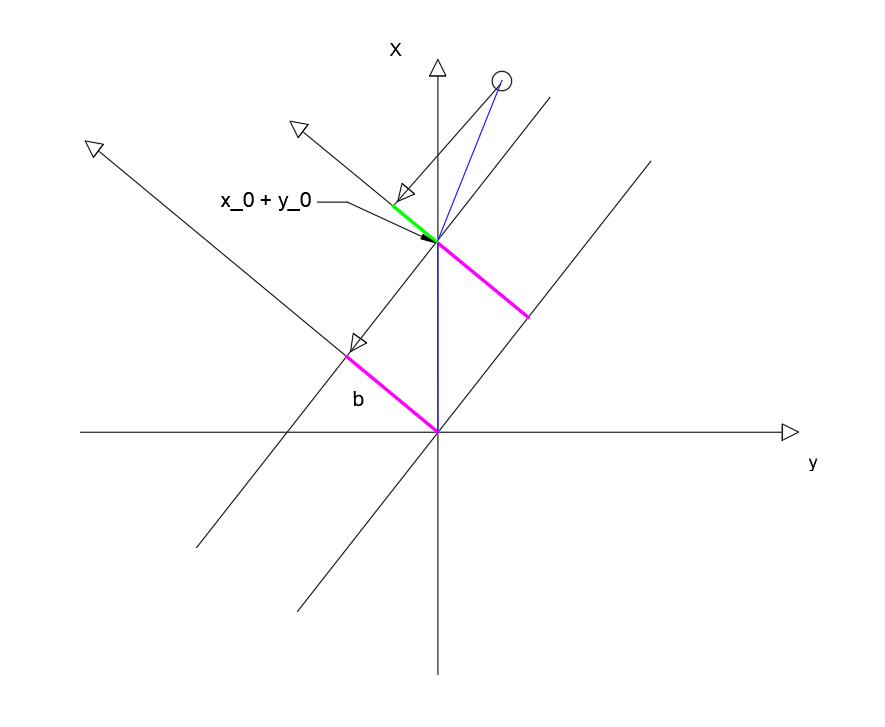

### Constrained problems

#### Lagrange Multiplier

The Lagrange multipliers states that there is certain point of a constraint g(x) and a function f(x) where the tangent passing through both functions, will have the same direction, and therefore their gradients would be equivalent.

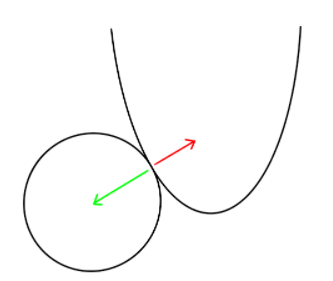


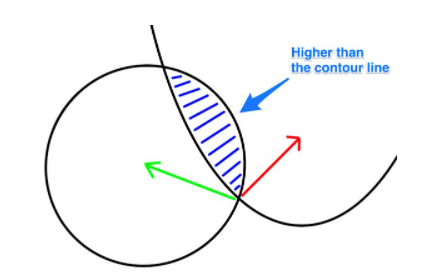

It can be described mathematically as

$$ \nabla f(x) = \lambda \nabla g(x)$$

$$ \nabla f(x) - \nabla g(x) = 0$$

$$ \nabla[f(x) - g(x)] = 0$$

We can define an auxiliary function

$$\mathcal{L}(x, \lambda) = f(x) - \lambda g(x)$$

For multiple constraints

$$\mathcal{L}(x, \lambda) = f(x) - \sum_{i = 1}^{N}\lambda_i g(x) = f(x) - \lambda^T g(x)$$

From which we get the gradient over $x$ and $\lambda$ of $\mathcal{L}$ and equalize to zero, to find the local (as the function is constrained) maximums and minimums.

It is important to mention that the sign of the Lagrangian's latter coefficient can be either positive or negative, in which case, the $\lambda$ can take either positive or negative values to compensate.

The Lagrange multipliers can solve for equality constraints ($h(x) = c$) as well as inequalities ($g(x) \leq 0$), but for latter case, we have to constrain the Lagrange multiplier so that the primal variable gets the optimal value (either minimum or maximum). The sign on the product of the constraints is equally important, whether we define $g(x)>0$ or $g(x)<0$. It also has to satisfy the complementary slackness condition. This is explained in-depth in the Karush-Kuhn-Tucker condition section.

Lagrange multipliers
- https://www.youtube.com/watch?v=8mjcnxGMwFo

- https://towardsdatascience.com/lagrange-multiplier-demystified-1e5fd55cee5a

- https://en.wikipedia.org/wiki/Lagrange_multiplier#:~:text=In%20mathematical%20optimization%2C%20the%20method,chosen%20values%20of%20the%20variables).

#### Karush–Kuhn–Tucker conditions

The Karush-Kuhn-Tucker (KKT) conditions are a set of rules to follow when solving for general optimization problems by the Primal and Dual Lagrangian. 

Given a target function to optimize $f(x)$ and constraints $g_i(x) \leq 0$ and $h_j(x) = 0$

$$
\begin{align}
\text{opt} \;\; & f(\mathbf{x})\\
& \mathbf{g}(\mathbf{x}) \leq 0\\
& \mathbf{h}(\mathbf{x}) = 0
\end{align}
$$

The Lagrangian is defined as

$$ 
\begin{equation}
    \mathcal{L(x, \lambda, \mu)} = f(\mathbf{x}) + \lambda^T\mathbf{g}(\mathbf{x}) + \mu^T\mathbf{h}
\end{equation}
$$

$\lambda \geq 0, g(x) \geq 0$

$-[(+)(+)] = (-) \rightarrow$ minimizing, negative gradient

$-[(+)(-)] = (+) \rightarrow$ minimizing, constraint $g(x) \geq $ broken, positive gradient

Karush–Kuhn–Tucker conditions
- https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions

#### Indicator Function

We can solve a constrained problem of the form 
$$ 
\begin{align}
&\min_{x} f(x)\\
& & (a)\\
&\text{S. t.  } g(x) \leq 0
\end{align}
$$

Transforming it into an unconstrained problem through an indicator/characteristic function

$\mathcal{P}(x) = f(x) + \sum_{i = 1}^N \mathbf{1} g(x) $

where 


$$ \mathbf{1}(\mathcal{z})=  \left\{
\begin{array}{ll}
      0 & \mathcal(z) \leq 0 \\
      \infty & \mathcal(z) > 0\\
\end{array} 
\right. $$ 


Which gives infinity penalty when the constriction is not satisfied. In most cases this method is not easy to calculate.
The Lagrange multipliers is used to solve this kind of problems instead.


#### Duality 

The dual problem in Lagrange multipliers is used to simplify the computation of some sets, it also helps on finding extra information about the primal problem, which helps to find a solution.


In the case of the Support Vector Machine, it helps to insert kernels into the problem, which can only be added when the loss function does not depend on the primal variables.

The primal problem solve for n number of variables and m constraints, while the dual problem solves for m variables and n constraints.

<br>

Given the standard constrained problem, we know it can be solved by constructing the Lagrangian, which depends on two variables $x$ and $\lambda$ 

$$
\begin{align}
    \mathcal{L}(x, \lambda) = f(x) + \sum_{i = 1}^{N}\lambda_i g(x)
\end{align}
$$

In the last equation, if we let lambdas get any real value, and the constraint ($g(x) \leq 0$) is broken, the model can find an opposite sign $\lambda$, that minimizes $f(x)$ over $x$ by the product $-\lambda\cdot + g(x)$, then letting the model brake many constraints.

If we want to minimize $f(x)$ and at the same time, brake as few conditions as possible. The problem must be constraint for lambdas. Now we allow for positive values of $\lambda$ and try to maximize its value, so when a condition is broken, the maximum penalty is applied.

We can associate the problem with the indicator function, where we get 0 when $\mathbf{1}(\mathcal{z}) \leq 0$ ($\lambda \geq 0$) and $\infty$ when $\mathbf{1}(\mathcal{z}) \leq 0$ ($\max_{\lambda \geq 0}$). Thus, when $\lambda \geq 0$, the Lagrangian is a lower bound of the $\mathcal{P(x)}$ function.

$$\mathcal{P(x)} = \max_{\lambda \geq 0} \mathcal{L(x, \lambda)}$$

Ultimately what we want is to minimize $\mathcal{P(x)}$ over $x$, therefore, we obtain

$$
\begin{equation}
\min_{x} \mathcal{P(x)} = \min_{x} \max_{\lambda \geq 0} \mathcal{L(x, \lambda)}
\end{equation}
$$

In other words, the minimum over $x$ of the primal problem is equal to the minimum over $x$ of the maximum over $\lambda\geq 0$ of the Lagrangian.

$\mathcal{P(x)}$ is known as the **primal** function. which we can use to solve sets in the form ($a$). We could try to solve in the opposite way, specifically 
$$\max_{\lambda \geq 0} \min_{x} \mathcal{L(x, \lambda)}$$

Where 

$$
\begin{equation}
\mathcal{D(\lambda)} =  \min_{x} \mathcal{L(x, \lambda)}
\end{equation}
$$

$\mathcal{D(\lambda)}$ is known as the **dual** function and $\lambda$ the dual variable.

But it turn out that swapping the order of the pair min-max does not return the same value for all cases. This is known as the min-max inequality.

$$
\begin{equation}
\min_{x} \max_{\lambda \geq 0} \mathcal{L(x, \lambda)} \leq 
\max_{\lambda \geq 0} \min_{x} \mathcal{L(x, \lambda)}
\end{equation}
$$

There is a special group of function for which the min-max of the Lagrangian return the same value as the min-max. This group of functions is called convex functions. 

The SVM target function and constraints are all convex, and therefore, the min-max inequality does not have an effect on this problem.

1. The dual problem is constructed by first building the Lagrangian of a minimization problem ($\min_{x} \mathcal{L(x, \lambda)}$), with positive defined dual variables ($\lambda \geq 0$). 
2. Apply the first order conditions ($\nabla \mathcal{L}(x) = 0$) with respect to the primal variables. 
3. Rebuild the Lagrangian with respect to the dual variables and add the constraints that resulted from the previous step.

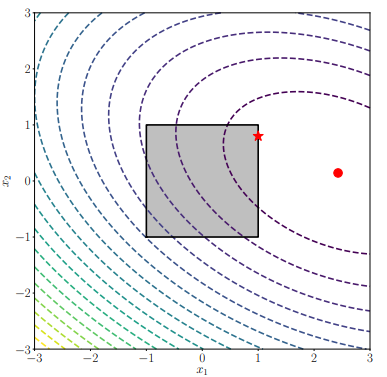

Duality and Complementary Slackness Condition

https://courses.cs.washington.edu/courses/cse521/16sp/521-lecture-16.pdf

Convex optimization, min-max inequality and Linear Programming
- https://youtu.be/oLowhs83aHk

Convex function
- https://youtu.be/nOFXLCCvtm0

#### Min-max inequality and Complementary Slackness for linear solutions

##### Min-max

In [2]:
#### Programacion lineal -- convexa -- minmax == maxmin

##### Complementary Slackness

The complementary Slackness constraints are constraints necessary to solve a dual problem and help on finding the points that work as support vectors on the SVM problem. 

They are the product of the dual and primal variables.